# RQ2 Does SATD in commit messages correlate with high code complexity?

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Compare the complexity change over the whole commit from commits with SATD comments with every other commit.

In [51]:
df1 = pd.read_excel('../final_commons-compress_q2.xlsx')
df2 = pd.read_excel('../final_commons-vfs_q2.xlsx')
df3 = pd.read_excel('../final_javalin_q2.xlsx')
df4 = pd.read_excel('../final_jessie_q2.xlsx')
df = pd.concat([df1, df2, df3,df4], axis=0)


In [52]:
df

,hash,file_name,method_name,Date,before_satd,before_ccn,after_satd,after_ccn,commit_message,is_message_satd
0,46bb5d4805aab058d441a30d809ff1199e634bd5,CBZip2InputStream.java,CBZip2InputStream::close,commit.committer_date,0,8,0,1,The underlying InputStream really should be cl...,False
1,9059501876ce6aa36e4e6d429556c3e88cd50d4e,BzipTestCase.java,BzipTestCase::testCBZip2InputStreamClose,commit.committer_date,0,1,0,2,PR: 36597\nSubmitted by: Hiroki Ata <hiroki.at...,False
2,2fdb96371d4619deb291979b45c9403d5e09f151,TarTestCase.java,TarTestCase::testArchive8GbFile,commit.committer_date,0,1,0,1,Fixed TarOutputStream for files bigger than 2G...,False
3,64eb32689dac0635530b704696d2b5eebecd47bb,ChangeSetTestCase.java,ChangeSetTestCase::testChangeSet,commit.committer_date,0,3,0,1,make it a test at least\n\n\n\ngit-svn-id: htt...,False
4,d1789e669d7abff2e9a8cf57110283d344d496cb,TarTestCase.java,TarTestCase::testTarArchiveLongNameCreation,commit.committer_date,0,1,0,2,applying patch from Christian Grobmeier\n\nhtt...,False
...,...,...,...,...,...,...,...,...,...,...
99,06cf84ad398827d05f9d046cbb7045907b1f74cc,SseSessionKeepAlive.java,SseSessionKeepAlive::schedule,commit.committer_date,0,1,0,1,"Massive restructuring of executor services, to...",False
100,cb4059fa9a9a956115934150a2ae305bbf107def,SseEvent.java,SseEvent::getDataAsString,commit.committer_date,0,5,0,1,"Added Mappers to unit test, to make sure that ...",False
101,6cb8a5817572c687b8f039feaba714c53f95abd0,SseSession.java,SseSession::getSessionId,commit.committer_date,0,1,0,1,added sessionId generation in the session mana...,False
102,6cb8a5817572c687b8f039feaba714c53f95abd0,SseSessionManager.java,SseSessionManager::getSessionId,commit.committer_date,0,3,0,1,added sessionId generation in the session mana...,False


In [41]:
def calculate_diff_satd_ccn(df):
        df['diff_ccn'] = df['after_ccn'] - df['before_ccn']
        return df


In [42]:
df = calculate_diff_satd_ccn(df)

In [43]:
df_message_has_satd = df[df['is_message_satd'] == True]
df_message_has_not_satd = df[df['is_message_satd'] == False]


In [48]:
df_message_has_satd

,hash,file_name,method_name,Date,before_satd,before_ccn,after_satd,after_ccn,commit_message,is_message_satd,diff_ccn
67,463d6ebdebb2ea194254f1c3fab0a0f63ee212ce,ZipArchiveEntry.java,ZipArchiveEntry::ZipArchiveEntry,commit.committer_date,0,1,0,1,rename ZipEntry to ZipArchiveEntry\n\ngit-svn-...,True,0
68,463d6ebdebb2ea194254f1c3fab0a0f63ee212ce,ZipArchiveEntry.java,ZipArchiveEntry::clone,commit.committer_date,0,1,0,2,rename ZipEntry to ZipArchiveEntry\n\ngit-svn-...,True,1
69,463d6ebdebb2ea194254f1c3fab0a0f63ee212ce,ZipArchiveEntry.java,ZipArchiveEntry::getInternalAttributes,commit.committer_date,0,1,0,1,rename ZipEntry to ZipArchiveEntry\n\ngit-svn-...,True,0
70,463d6ebdebb2ea194254f1c3fab0a0f63ee212ce,ZipArchiveEntry.java,ZipArchiveEntry::setInternalAttributes,commit.committer_date,0,1,0,1,rename ZipEntry to ZipArchiveEntry\n\ngit-svn-...,True,0
71,463d6ebdebb2ea194254f1c3fab0a0f63ee212ce,ZipArchiveEntry.java,ZipArchiveEntry::getExternalAttributes,commit.committer_date,0,1,0,1,rename ZipEntry to ZipArchiveEntry\n\ngit-svn-...,True,0
...,...,...,...,...,...,...,...,...,...,...,...
437,09764abbcd8b9973063b45a9f61cf80cfdde900a,JavaTest.java,JavaTest::instantiate_JavalinTestTool,commit.committer_date,0,1,0,1,[testtools] Make it possible to instantiate a ...,True,0
438,a0510d8c7e81c438ff66249f183be9aa8c80d60c,JavaTest.java,JavaTest::exceptions_in_test_code_get_rethrown,commit.committer_date,0,1,0,1,[testtool] Add test cases for exception handli...,True,0
439,a0510d8c7e81c438ff66249f183be9aa8c80d60c,JavaTest.java,JavaTest::exceptions_in_handler_code_are_caugh...,commit.committer_date,0,1,0,1,[testtool] Add test cases for exception handli...,True,0
440,a0510d8c7e81c438ff66249f183be9aa8c80d60c,JavaTest.java,JavaTest::exception_in_handler_code_is_include...,commit.committer_date,0,1,0,2,[testtool] Add test cases for exception handli...,True,1


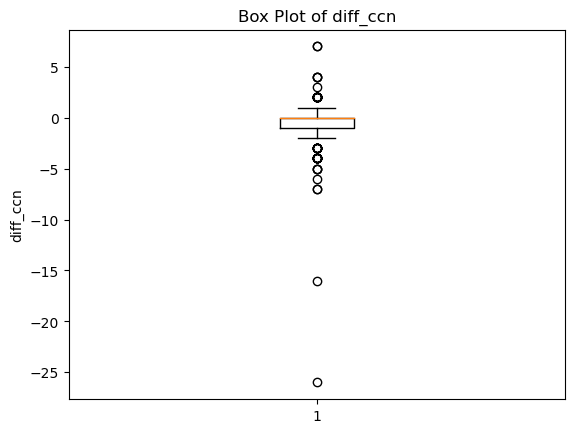

In [53]:
plt.boxplot(df_message_has_not_satd['diff_ccn'])

# Set the y-axis label
plt.ylabel('diff_ccn')

# Set the title of the plot
plt.title('Box Plot of diff_ccn')

# Display the plot
plt.show()

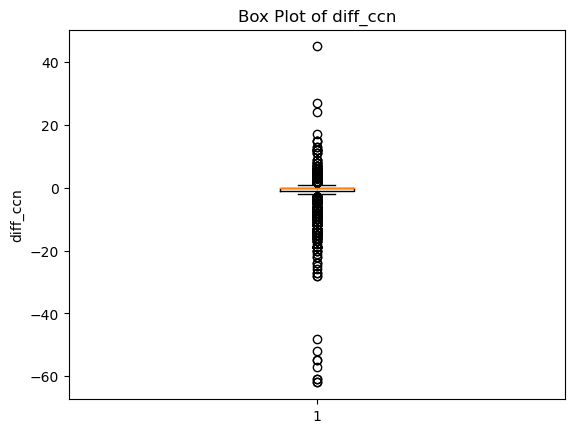

In [47]:
plt.boxplot(df_message_has_satd['diff_ccn'])

# Set the y-axis label
plt.ylabel('diff_ccn')

# Set the title of the plot
plt.title('Box Plot of diff_ccn')

# Display the plot
plt.show()

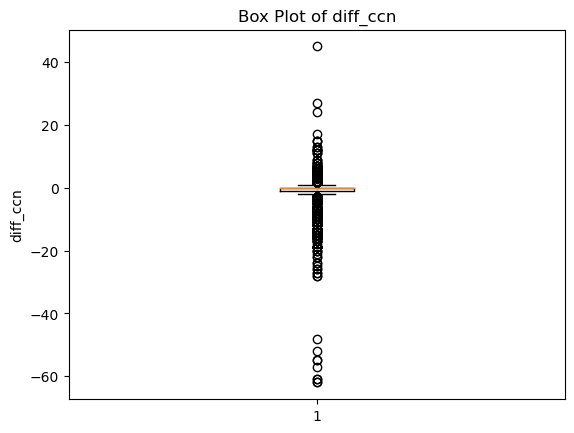

In [49]:
plt.boxplot(df['diff_ccn'])

# Set the y-axis label
plt.ylabel('diff_ccn')

# Set the title of the plot
plt.title('Box Plot of diff_ccn')

# Display the plot
plt.show()

In [34]:
group1 = df_message_has_satd['diff_ccn']
group2 = df_message_has_not_satd['diff_ccn']

t-test is used to compare the means of two groups of data.It assumes that the data is normally distributed and the variances of the two groups are equal.

In [54]:
from scipy.stats import ttest_ind

# Calculate the t-test

t_stat, p_value = ttest_ind(group1, group2)

# Print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -0.6255141567190478
p-value:  0.5317025472291319


The t-statistic is a measure of how many standard errors the sample mean is away from the hypothesized population mean. It is used in hypothesis testing to determine if the difference between the sample mean and the population mean is statistically significant. The larger the absolute value of the t-statistic, the more evidence there is against the null hypothesis.

Here are some general guidelines for interpreting the t-statistic:

If the t-statistic is positive, it means that the sample mean is greater than the hypothesized population mean.
If the t-statistic is negative, it means that the sample mean is less than the hypothesized population mean.
The absolute value of the t-statistic indicates how many standard errors the sample mean is away from the hypothesized population mean. A larger absolute value indicates a greater deviation from the hypothesized population mean.
A t-statistic with a p-value less than the chosen level of significance (usually 0.05) indicates that the difference between the sample mean and the hypothesized population mean is statistically significant. In other words, there is strong evidence against the null hypothesis.
A t-statistic with a p-value greater than the chosen level of significance indicates that the difference between the sample mean and the hypothesized population mean is not statistically significant. In other words, there is not enough evidence to reject the null hypothesis.

#### Mann-Whitney U test

In [37]:
from scipy.stats import ranksums

# conduct the Wilcoxon rank-sum test
u_stat, p_value = ranksums(group1, group2)

# print the results
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: -0.42412837218245225
p-value: 0.6714721948699801


U-statistic: The U-statistic is a non-parametric measure of the difference between the two independent samples. It is calculated by ranking all the observations from both samples together and then summing the ranks of the observations from one of the samples. The U-statistic can range from 0 to n1*n2, where n1 and n2 are the sizes of the two samples. A larger U-statistic indicates a greater difference between the two samples.

p-value: The p-value is the probability of observing a difference as large as or larger than the one in the sample data, assuming that the null hypothesis is true. The null hypothesis for the Wilcoxon rank-sum test is that the two samples have the same distribution. If the p-value is less than the chosen level of significance (usually 0.05), then the null hypothesis is rejected and it is concluded that the two samples have different distributions. If the p-value is greater than the level of significance, then the null hypothesis is not rejected and it is concluded that there is not enough evidence to suggest that the two samples have different distributions.